In [1]:
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from pylab import rcParams

from utils import METRICS, CONT_PARAMETERS, LOG_PARAMETERS, SET_PARAMETERS, INT_PARAMETERS, read_files,\
    top_mean_dev_auc, top_min_whole_validation_auc, top_min_dev_auc, read_files

In [2]:
rcParams['figure.figsize'] = 20, 5
pd.set_option('display.max_columns', None)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
files = ['./experiments/better.pkl']

In [5]:
top_k = 100000

In [6]:
best_mean_dev = top_mean_dev_auc(read_files(files), top_k)
best_mean_dev.groupby(['file', 'experiment_id']).ngroups

391

In [7]:
best_min_dev = top_min_dev_auc(read_files(files), top_k)
best_min_dev.groupby(['file', 'experiment_id']).ngroups

506

In [8]:
true_best = top_min_whole_validation_auc(read_files(files), top_k)
true_best.groupby(['file', 'experiment_id']).ngroups

538

In [9]:
compare_columns = ['mean_dev_auc', 'mean_validation_auc',
               'mean_whole_validation_auc', 'max_overfit_auc',
                   'min_dev_auc', 'min_validation_auc', 'min_whole_validation_auc']

In [10]:
best_mean_dev[compare_columns].describe().T

count      mean       std       min       25%  \
mean_dev_auc               100000.0  0.835695  0.000537  0.834825  0.835245   
mean_validation_auc        100000.0  0.809081  0.001616  0.804250  0.808019   
mean_whole_validation_auc  100000.0  0.809235  0.002150  0.803339  0.807708   
max_overfit_auc            100000.0  0.031849  0.003625  0.023375  0.029222   
min_dev_auc                100000.0  0.811897  0.001500  0.805814  0.811093   
min_validation_auc         100000.0  0.806026  0.001983  0.800001  0.804540   
min_whole_validation_auc   100000.0  0.808880  0.002060  0.803252  0.807426   

                                50%       75%       max  
mean_dev_auc               0.835652  0.836101  0.837228  
mean_validation_auc        0.809234  0.810211  0.814265  
mean_whole_validation_auc  0.809347  0.810829  0.814325  
max_overfit_auc            0.031413  0.034027  0.047544  
min_dev_auc                0.812004  0.812858  0.816476  
min_validation_auc         0.806137  0.807519  0.811887  
min_whole_validation_auc   0.809019  0.810379  0.813936

In [11]:
best_min_dev[compare_columns].describe().T

count      mean       std       min       25%  \
mean_dev_auc               100000.0  0.834431  0.001596  0.828377  0.833198   
mean_validation_auc        100000.0  0.808839  0.001758  0.801945  0.807506   
mean_whole_validation_auc  100000.0  0.809428  0.002020  0.799074  0.808072   
max_overfit_auc            100000.0  0.026892  0.003390  0.018647  0.024366   
min_dev_auc                100000.0  0.813087  0.000792  0.812103  0.812457   
min_validation_auc         100000.0  0.806310  0.001974  0.792521  0.804893   
min_whole_validation_auc   100000.0  0.808987  0.002085  0.797601  0.807797   

                                50%       75%       max  
mean_dev_auc               0.834662  0.835776  0.837228  
mean_validation_auc        0.808989  0.810119  0.814265  
mean_whole_validation_auc  0.809675  0.810846  0.814325  
max_overfit_auc            0.026607  0.029395  0.038101  
min_dev_auc                0.812907  0.813497  0.816476  
min_validation_auc         0.806523  0.807741  0.811887  
min_whole_validation_auc   0.809207  0.810396  0.813936

In [12]:
true_best[compare_columns].describe().T

count      mean       std       min       25%  \
mean_dev_auc               100000.0  0.833100  0.012194  0.500000  0.833088   
mean_validation_auc        100000.0  0.808453  0.011239  0.500000  0.808440   
mean_whole_validation_auc  100000.0  0.810826  0.000973  0.809241  0.810081   
max_overfit_auc            100000.0  0.028510  0.003377  0.000000  0.026210   
min_dev_auc                100000.0  0.806741  0.038154  0.500000  0.810477   
min_validation_auc         100000.0  0.802112  0.037562  0.500000  0.805809   
min_whole_validation_auc   100000.0  0.810432  0.000930  0.809241  0.809714   

                                50%       75%       max  
mean_dev_auc               0.834528  0.835705  0.837125  
mean_validation_auc        0.809611  0.810438  0.814265  
mean_whole_validation_auc  0.810672  0.811392  0.814325  
max_overfit_auc            0.028334  0.030392  0.043442  
min_dev_auc                0.812067  0.813089  0.816476  
min_validation_auc         0.807038  0.808011  0.811887  
min_whole_validation_auc   0.810255  0.810901  0.813936

In [13]:
best = best_mean_dev

In [14]:
best.shape

(100000, 61)

In [15]:
best.groupby(SET_PARAMETERS + ['file', 'experiment_id']).size().groupby(SET_PARAMETERS).size()

param_is_unbalance  param_boost_from_average
False               False                        94
                    True                         95
True                False                        99
                    True                        103
dtype: int64

In [16]:
best['param_bagging_enable'] = (best.param_bagging_freq != 0)
best.groupby('param_bagging_enable').size()

param_bagging_enable
False    87473
True     12527
dtype: int64

In [17]:
best['param_feature_fraction_enable'] = (best.param_feature_fraction != 1)
best.groupby('param_feature_fraction_enable').size()

param_feature_fraction_enable
False    52259
True     47741
dtype: int64

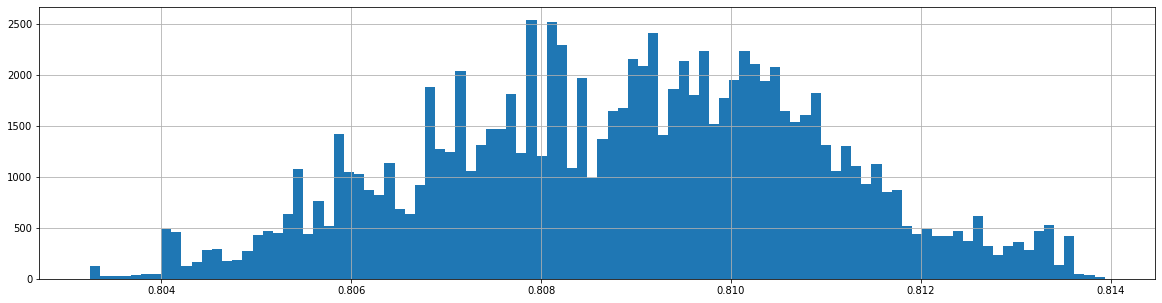

In [18]:
best.min_whole_validation_auc.hist(bins=100);

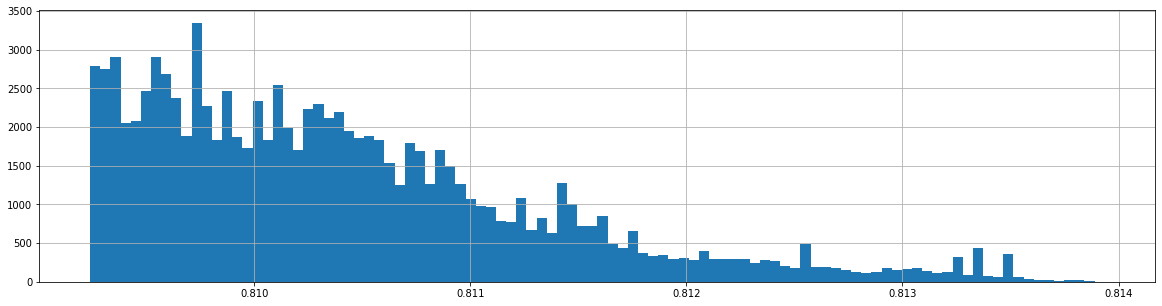

In [19]:
true_best.min_whole_validation_auc.hist(bins=100);

In [20]:
best_iteration = best.sort_values('mean_dev_auc').groupby(['file', 'experiment_id']).last()

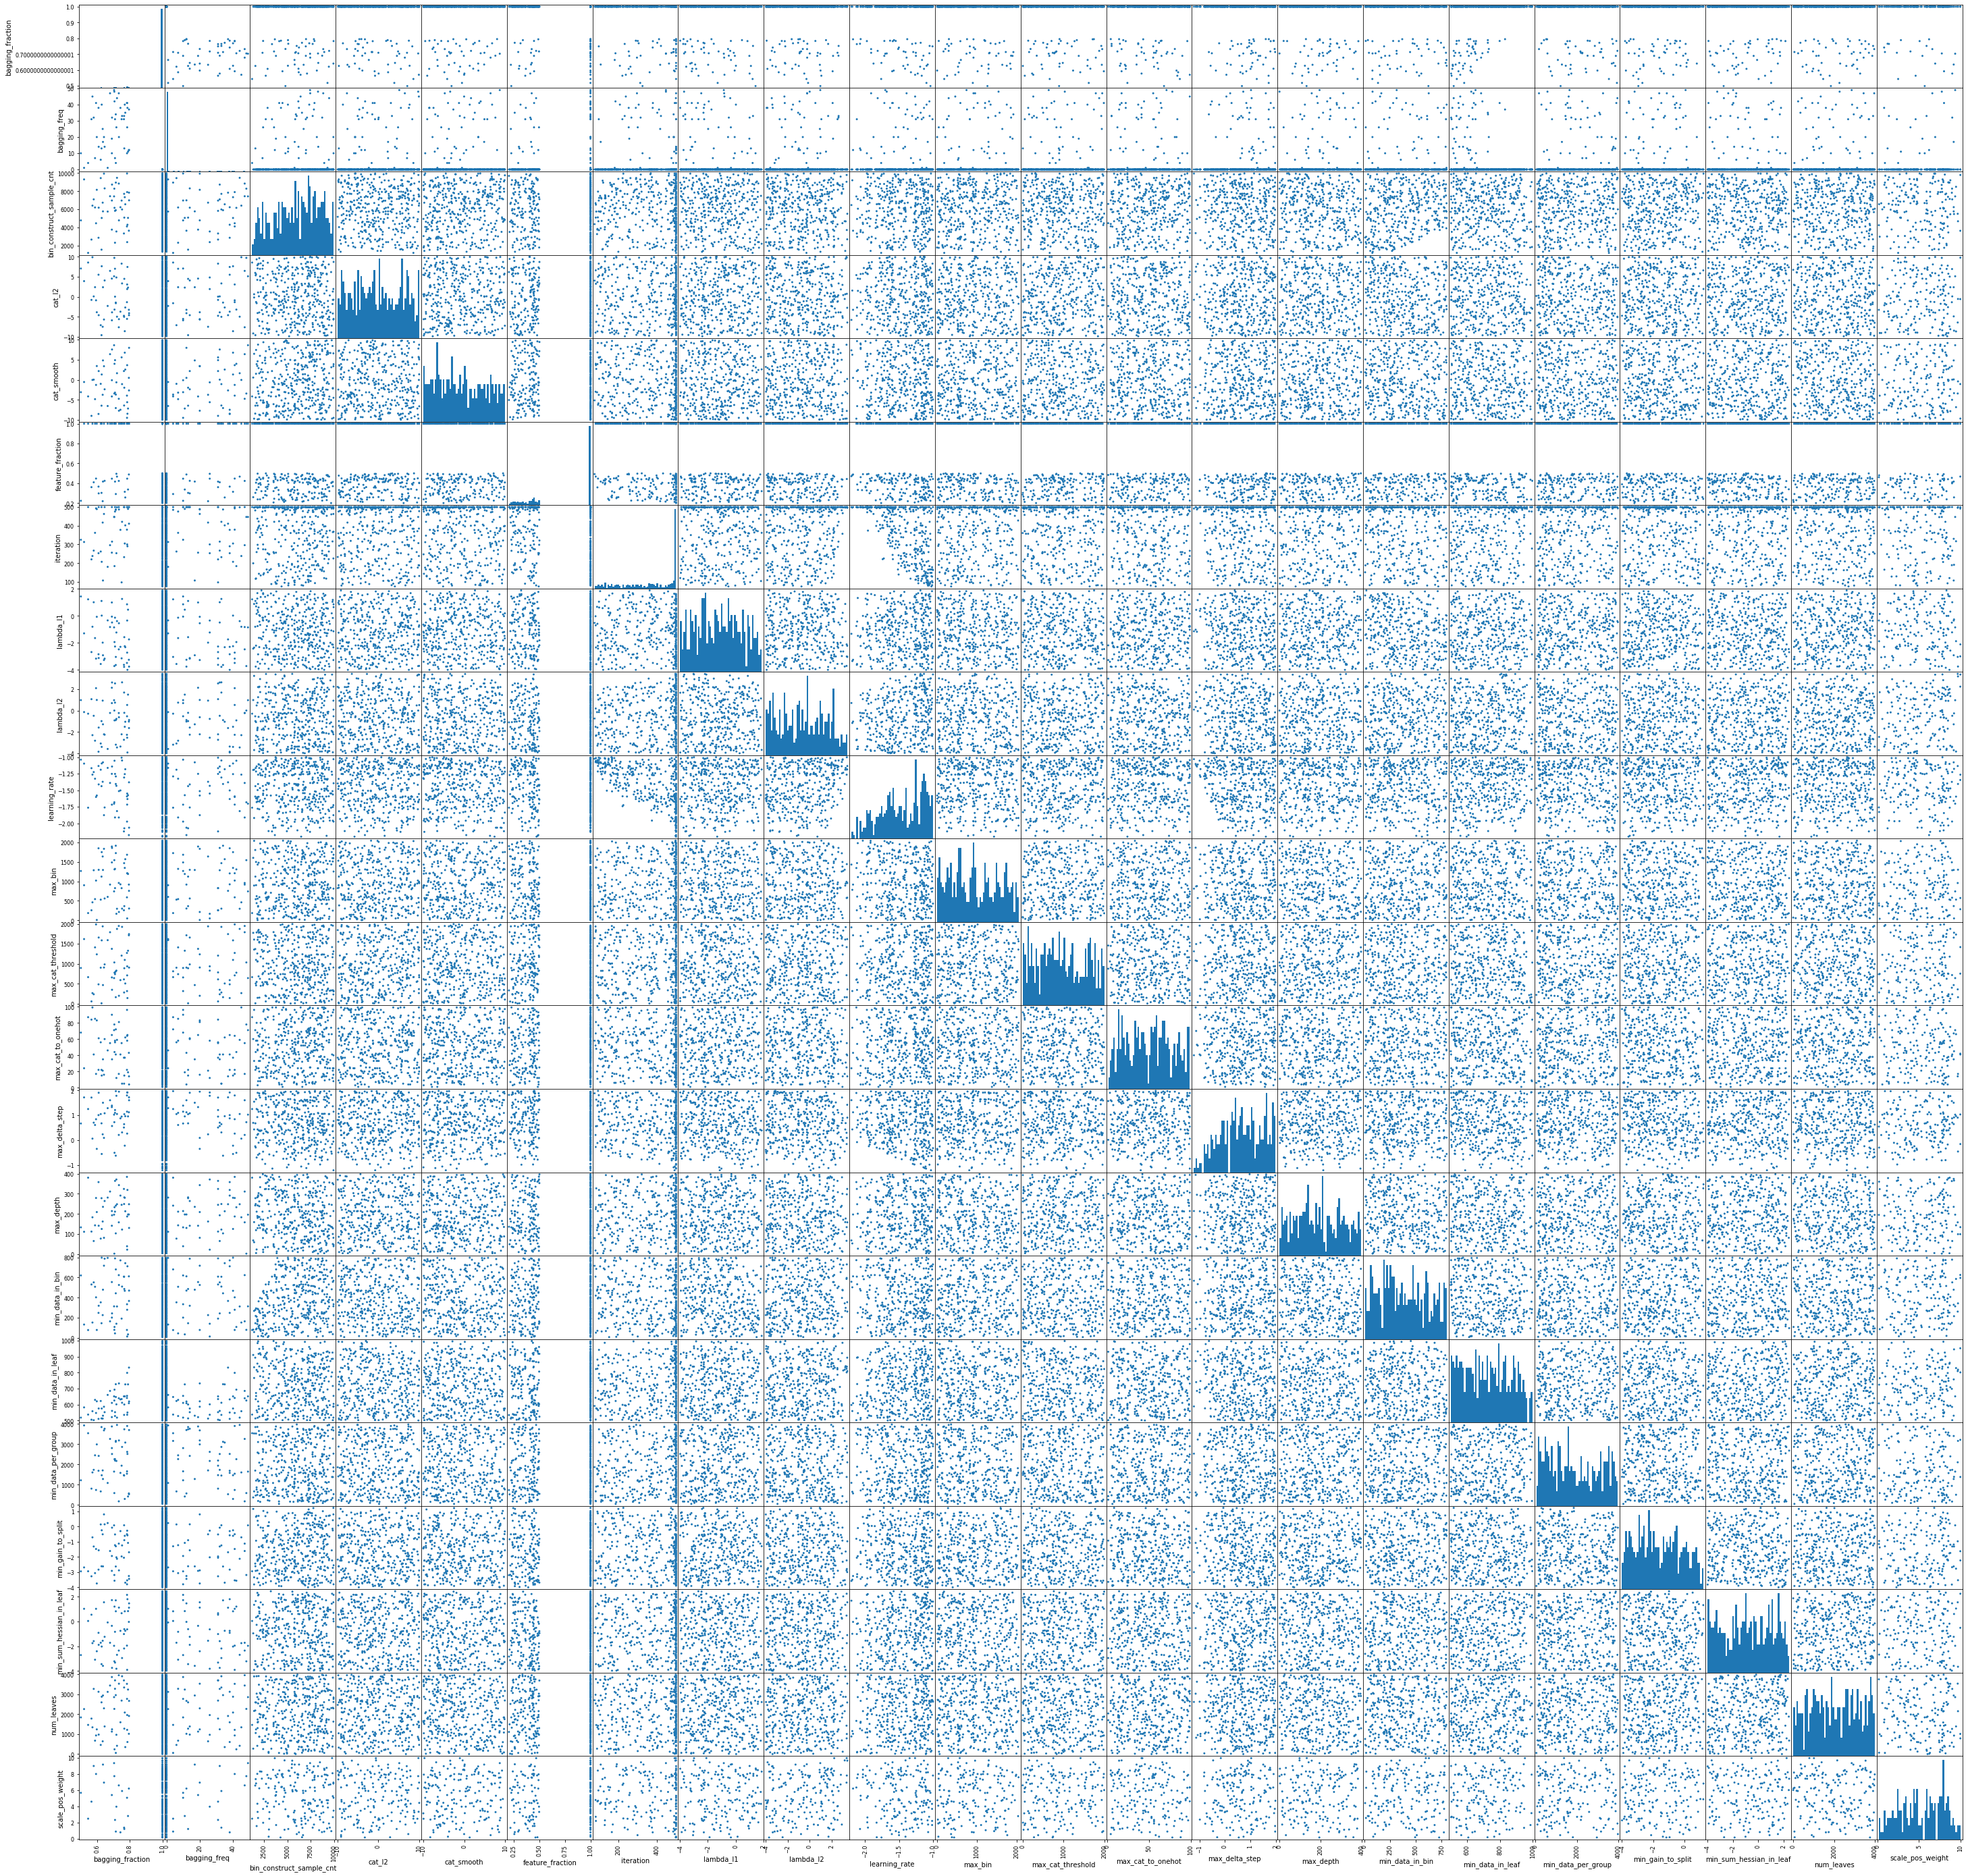

In [21]:
pd.plotting.scatter_matrix(
    pd.concat([best_iteration[CONT_PARAMETERS + INT_PARAMETERS], 
               np.log10(best_iteration[list(set(LOG_PARAMETERS))])],
              axis='columns',
              sort=True
             ).rename(lambda x: x.replace('param_', ''), axis='columns').sort_index(axis=1),
    alpha=1, figsize=(50, 50), hist_kwds={'bins': 50});

### check failures in best selected parameter range

In [22]:
best_range = best\
    [[c for c in best.columns if c.startswith('param_') and not c in SET_PARAMETERS]]\
    .drop(columns=['param_seed', 'param_bagging_enable', 'param_feature_fraction_enable'])\
    .quantile([0, 1]).T
best_range

0.0           1.0
param_bagging_fraction          4.981777e-01  1.000000e+00
param_bagging_freq              0.000000e+00  4.900000e+01
param_bin_construct_sample_cnt  1.197000e+03  9.959000e+03
param_cat_l2                    1.271845e-10  9.809727e+09
param_cat_smooth                1.018453e-10  7.946090e+09
param_feature_fraction          2.001876e-01  1.000000e+00
param_lambda_l1                 1.020290e-04  7.541807e+01
param_lambda_l2                 1.007032e-04  2.744801e+03
param_learning_rate             6.276926e-03  9.954647e-02
param_max_bin                   6.000000e+00  2.046000e+03
param_max_cat_threshold         3.000000e+00  1.996000e+03
param_max_cat_to_onehot         1.000000e+00  9.900000e+01
param_max_delta_step            6.069011e-02  9.618732e+01
param_max_depth                 2.000000e+00  3.970000e+02
param_min_data_in_bin           7.000000e+00  7.980000e+02
param_min_data_in_leaf          5.000000e+02  9.970000e+02
param_min_data_per_group        5.600000e+01  3.976000e+03
param_min_gain_to_split         1.013288e-04  1.668566e+01
param_min_sum_hessian_in_leaf   1.038672e-04  2.784748e+02
param_num_leaves                3.000000e+00  3.988000e+03
param_scale_pos_weight          1.668145e-01  9.985833e+00

In [23]:
dfs = []
for f in files:
    df = pd.read_pickle(f).assign(file=f)
    for (n, l, h) in best_range.itertuples():
        df = df[(((df[n] >= l) & (df[n] <= h))
                 | df[n].isna())].copy()
    dfs.append(df)

limited = pd.concat(dfs, ignore_index=True, sort=True)
del dfs
limited.shape

(500500, 61)

In [24]:
limited_best_iteration = limited.sort_values('min_whole_validation_auc').groupby(['file', 'experiment_id']).last()
limited_best_iteration.shape

(1001, 59)

In [25]:
limited_bad = limited_best_iteration[limited_best_iteration.min_whole_validation_auc < 0.6]

In [26]:
limited_bad.shape

(38, 59)

TODO pikachu with bruises reaction

### top parameters

In [27]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(best_iteration.sort_values('mean_dev_auc', ascending=False).head(2).T)

file                                    ./experiments/better.pkl  \
experiment_id                                               1778   
cnt                                                            3   
iteration                                                    413   
max_dev_auc                                             0.854614   
max_dev_binary_logloss                                   0.53657   
max_overfit_auc                                        0.0307594   
max_overfit_binary_logloss                             0.0271915   
max_validation_auc                                      0.808955   
max_validation_binary_logloss                            0.54513   
max_whole_train_auc                                     0.840188   
max_whole_train_binary_logloss                          0.498968   
max_whole_validation_auc                                0.807191   
max_whole_validation_binary_logloss                     0.541721   
mean_dev_auc                                    